In [ ]:
import numpy  as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1377,1378,15808228,Tuan,768,Spain,Female,44,6,60603.40,1,1,1,178045.97,0
3243,3244,15716781,Dolgorukova,815,France,Male,24,7,171922.72,1,0,1,178028.96,0
7069,7070,15692137,Jen,759,France,Female,46,2,0.00,1,1,1,138380.11,0
9312,9313,15658946,Piccio,579,Germany,Male,40,10,45408.85,2,1,0,18732.91,0
4243,4244,15622518,Stephenson,768,France,Female,26,5,51116.26,1,1,1,70454.79,1
7167,7168,15732884,Trevisano,676,France,Male,29,7,131959.86,1,0,0,189268.81,0
9483,9484,15675983,Wood,692,France,Female,36,3,79551.12,1,0,1,178267.07,0
5599,5600,15635870,She,579,Germany,Female,50,5,117721.02,1,0,1,192146.63,1
8104,8105,15805413,Chiang,769,France,Female,31,6,117852.26,2,1,0,147668.64,0
1513,1514,15729040,Lamb,440,France,Male,42,2,0.00,2,1,0,49826.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace= True)

In [ ]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:

pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
x = df.drop(columns = ['Exited'])
y = df['Exited']

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder



encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output


categorical_cols = ['Geography', 'Gender']
encoded_data = encoder.fit_transform(df[categorical_cols])


encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)


x = df.drop(columns=['Exited'])
y = df['Exited']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,0.0,1.0,0.0,0.0,1.0
5140,626,29,4,105767.28,2,0,0,41104.82,1.0,0.0,0.0,1.0,0.0
2568,612,47,6,130024.87,1,1,1,45750.21,0.0,1.0,0.0,1.0,0.0
3671,646,52,6,111739.40,2,0,1,68367.18,0.0,1.0,0.0,1.0,0.0
7427,714,33,8,122017.19,1,0,0,162515.17,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,0.0,1.0,0.0,0.0,1.0
7813,684,63,3,81245.79,1,1,0,69643.31,0.0,1.0,0.0,1.0,0.0
905,672,45,9,0.00,1,1,1,92027.69,1.0,0.0,0.0,1.0,0.0
5192,663,39,8,0.00,2,1,1,101168.90,1.0,0.0,0.0,1.0,0.0


In [ ]:
x_train_scaled.shape

(8000, 13)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model = Sequential()

model.add(Dense(13,activation = 'relu',input_dim = 13))
model.add(Dense(13,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile (loss = 'binary_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_scaled,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8751 - loss: 0.3030 - val_accuracy: 0.8625 - val_loss: 0.3325
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8777 - loss: 0.2954 - val_accuracy: 0.8625 - val_loss: 0.3309
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8756 - loss: 0.3003 - val_accuracy: 0.8631 - val_loss: 0.3332
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8836 - loss: 0.2921 - val_accuracy: 0.8625 - val_loss: 0.3328
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.3004 - val_accuracy: 0.8644 - val_loss: 0.3322
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8797 - loss: 0.3022 - val_accuracy: 0.8644 - val_loss: 0.3332
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8781 - loss: 0.2976 - val_accuracy: 0.8619 - val_loss: 0.3316
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8785 - loss: 0.2982 - val_accu

In [ ]:
model.layers[1].get_weights()

[array([[-0.23887907,  0.0873758 ,  0.7684941 , -0.5843167 ,  0.20964356,
          0.4715743 , -0.34363934, -0.9028523 , -0.354725  , -0.37388286,
         -0.19033116, -0.23198085, -0.13678698],
        [ 0.4471911 , -0.9161089 , -0.13082874,  0.0363153 , -1.3005676 ,
         -1.1254085 ,  0.3670462 ,  0.07764791,  0.15236875, -0.7806381 ,
         -0.6791466 ,  0.40388846, -0.28346747],
        [ 0.4412318 , -0.35317636,  0.49786445,  0.2608922 , -0.10994159,
         -0.55199367,  0.13898104,  0.35513732, -0.6655473 ,  0.17542377,
         -0.54773355,  0.3876667 , -1.010204  ],
        [-0.3087238 , -0.055266  ,  0.28102463,  0.58013487,  0.69692475,
         -0.4621554 , -4.9560256 ,  0.00577085, -0.2930982 , -0.3080667 ,
          0.28970218, -0.09959766,  0.6179988 ],
        [ 0.45850176, -0.2958068 ,  0.0374544 ,  0.1728348 ,  0.5615939 ,
         -1.8794391 , -0.2251055 , -0.23069412, -0.84726644, -0.19183719,
          0.14610203, -0.37164927, -0.06769162],
        [ 0.277

In [ ]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history

{'accuracy': [0.8782812356948853,
  0.8770312666893005,
  0.878125011920929,
  0.8782812356948853,
  0.8782812356948853,
  0.8785937428474426,
  0.8760937452316284,
  0.8784375190734863,
  0.8787500262260437,
  0.8792187571525574,
  0.8739062547683716,
  0.8751562237739563,
  0.8784375190734863,
  0.8779687285423279,
  0.8773437738418579,
  0.8782812356948853,
  0.8785937428474426,
  0.878125011920929,
  0.8784375190734863,
  0.8767187595367432,
  0.8756250143051147,
  0.8768749833106995,
  0.8754687309265137,
  0.8792187571525574,
  0.8776562213897705,
  0.8762500286102295,
  0.8764062523841858,
  0.8787500262260437,
  0.8776562213897705,
  0.8790624737739563,
  0.8774999976158142,
  0.8784375190734863,
  0.8779687285423279,
  0.879687488079071,
  0.8765624761581421,
  0.8764062523841858,
  0.87890625,
  0.8774999976158142,
  0.8793749809265137,
  0.8765624761581421,
  0.8773437738418579,
  0.8798437714576721,
  0.8785937428474426,
  0.8756250143051147,
  0.87890625,
  0.8762500286102

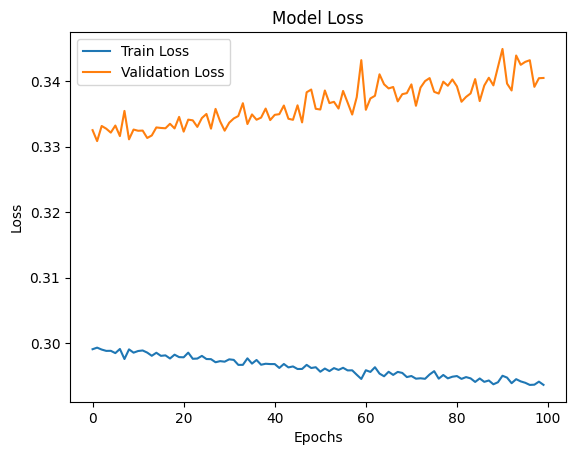

In [ ]:


# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Show the plot
plt.show()


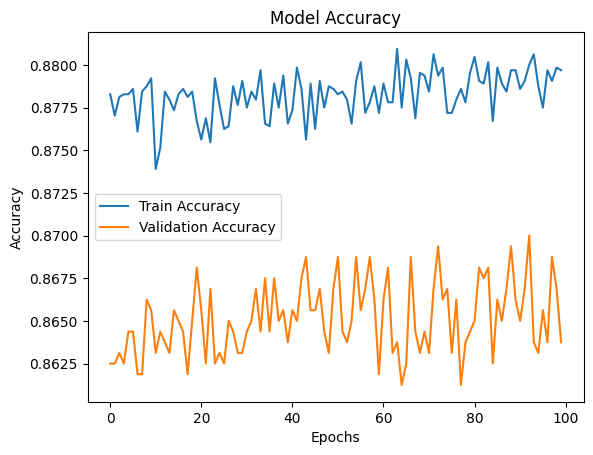

In [ ]:


# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add legend, labels, and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Show the plot
plt.show()
